1. Eigenface for face recognition

b)

(540, 2500) (540,)


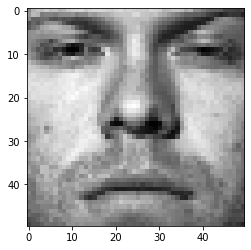

In [298]:
# import libraries
import numpy as np
import imageio
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from scipy.linalg import svd
from numpy import linalg as la
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

# lists to store training data and its labels
train_labels, train_data = [], []

# read training data and store in the correct format
for line in open('faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
    
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print (train_data.shape, train_labels.shape) # print array dimensions
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r) # show image
plt.show()

c)

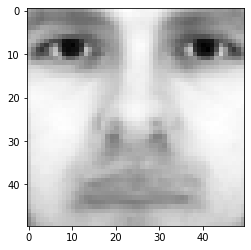

In [68]:
trainFaceAv = np.sum(train_data,0)/540 # calculate the average face
plt.imshow(trainFaceAv.reshape(50,50), cmap = cm.Greys_r) # display the average face image
plt.show()

d)

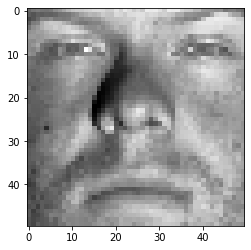

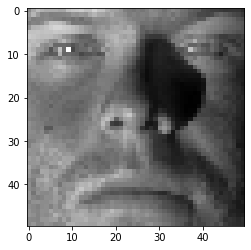

In [69]:
trainMinusAv = train_data - trainFaceAv # substract average face from training data
plt.imshow(trainMinusAv[1, :].reshape(50,50), cmap = cm.Greys_r) # show one of the resulting images
plt.show()

# lists to store testing data and its labels
test_labels, test_data = [], []

# read test data and store in the correct format
for line in open('faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
    
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

testMinusAv = test_data - trainFaceAv # substract average face from testing data
plt.imshow(testMinusAv[1, :].reshape(50,50), cmap = cm.Greys_r) # show one of the resulting images
plt.show()

e)

(540,)
(2500, 2500)
(540, 540)


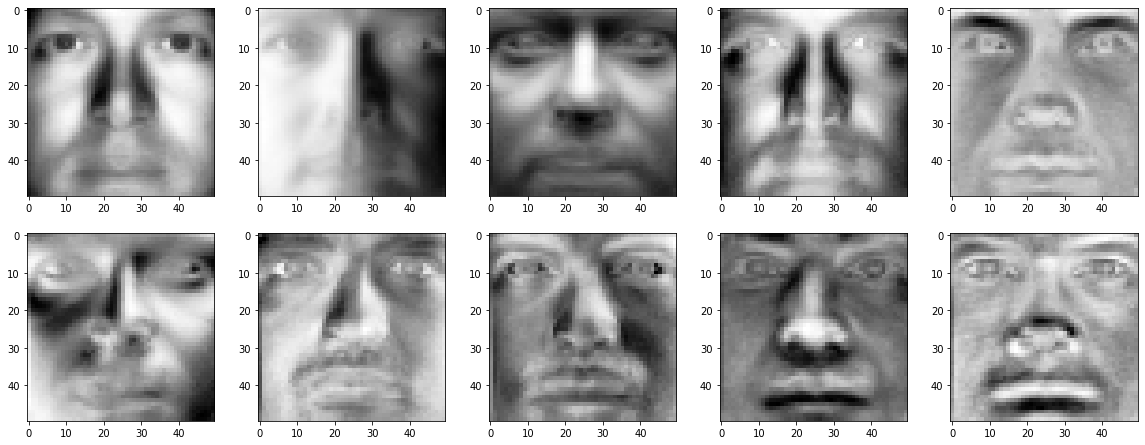

In [105]:
U, S, VTrans = svd(trainMinusAv) # perform Singular Value Decomposition (SVD) on the training data

# NOT SURE IF WE NEED TO USE X OR NEW X FOR THIS

plt.figure(figsize=(20,20)) # set plot space

# display the first 10 images in V Transpose (VTrans)
for i in range(10):
    plt.subplot(5,5,i+1)
    imshow(VTrans[i, :].reshape(50,50), cmap = cm.Greys_r) # show one of the resulting images

f)

Text(0, 0.5, 'Rank-r Approximation Error')

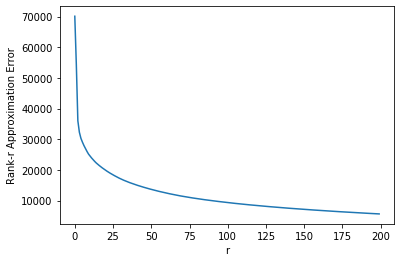

In [275]:
froList = [] # list to store Frobenius Norm values

# loop from r=1 to r=200
for j in range(200): 
    if(j==0):
        continue
    # calculate matrix products
    temp = np.dot(np.diag(S[:j]), VTrans[:j,:])
    Xr = np.dot(U[:,:j], temp) 
    # NOT SURE IF WE NEED TO USE X OR NEW X FOR THIS
    diff = np.subtract(trainMinusAv,Xr) # calculate difference between X and Xr
    froList.append(la.norm(diff,'fro')) # calculate Frobenius Norm of the difference

plt.plot(range(200), froList, label='Rank-r Approximation Error') # plot r against Frobenius Norm
plt.xlabel("r") # label x axis
plt.ylabel("Rank-r Approximation Error") # label y axis

g)

In [277]:
# function to generate Eigenface feature (F) matrices for the training and testing data
def generateFMatrix(trainImgs, testImgs, r): # take training images, testing images and the rank r as parameters
    F_train = np.dot(trainImgs, np.transpose(VTrans[:r, :])) # calculate F matrix for training data
    F_test = np.dot(testImgs, np.transpose(VTrans[:r, :])) # calculate F matrix for testing data
    return F_train, F_test # return both F matrices

In [282]:
# test the correct functioning of the generateFMatrix function
FMatrices = generateFMatrix(trainMinusAv, testMinusAv, 20)
print(FMatrices[0].shape)
print(FMatrices[1].shape)

(540, 20)
(100, 20)


h)

In [317]:
FMatrices = generateFMatrix(trainMinusAv, testMinusAv, 10) # get F matrices for r=10

lr = LogisticRegression()
Ps = OneVsRestClassifier(lr).fit(FMatrices[0], train_labels).predict(test_data)

Ps = model.predict(test_labels) # store predictions

print('The accuracy of our model is',((accuracy_score(test_labels, Ps))*100)) # calculate and print model accuracy



C:\Users\evatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\evatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\evatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\evatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\evatr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

ValueError: X has 2500 features per sample; expecting 10